In [1]:
import numpy as np
from astropy.io import fits,ascii
from DELCgen import *

import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rc('font', family='serif')

%matplotlib inline

In [2]:
def lc_binning(t,y,dy,width):
    """
    simple function to bin lightcurves with errors.
    
    Parameters
    ----------
    t : array, time 
    
    y : array, rate/flux
    
    dy : array, rate/flux uncertainty
    
    width : number, width of each bin in time
    
    Returns
    -------
    binned_t : binned time array
    
    binned_y : binned rate/flux array
    
    binned_dy : binned rate/flux uncertainty array
    
    """
    width = float(width)
    nbins = int(np.ceil((t[-1]-t[0])/width))+1
    binned_y = np.zeros(nbins)
    binned_y_weights = np.zeros(nbins)
    
    for i in range(len(y)):
        bin_no = int((t[i]-t[0])/width)
        weight = dy[i]**-2.0
        binned_y[bin_no] += y[i] * weight
        binned_y_weights[bin_no] += weight
        
    binned_y /= binned_y_weights
    binned_dy = np.sqrt(1.0/(binned_y_weights)) 
    binned_t = np.arange(start=t[0]+(width/2.0),stop=t[0]+nbins*width,step=width)
    return binned_t, binned_y, binned_dy

/home/arash/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in divide
/home/arash/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in divide


<ErrorbarContainer object of 3 artists>

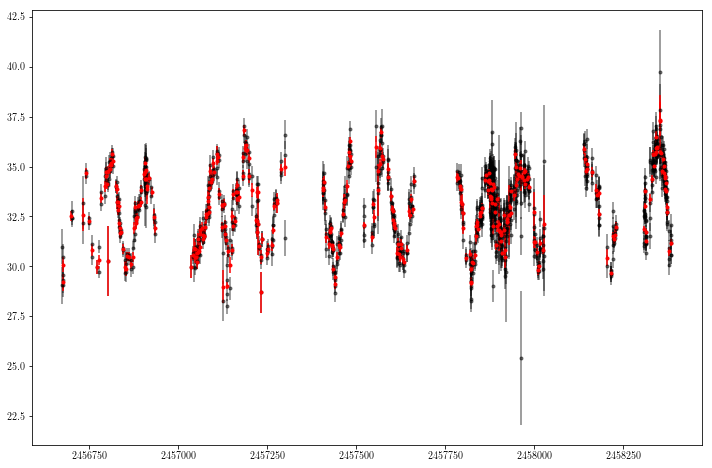

In [5]:
lc_data = ascii.read('/home/arash/Dropbox/J16194-2810_asassn.csv')

raw_t = lc_data[(lc_data['mag'] < 90) & (lc_data['Filter'] == 'V') & (lc_data['HJD'] > 2456674)]['HJD']
raw_y = lc_data[(lc_data['mag'] < 90) & (lc_data['Filter'] == 'V') & (lc_data['HJD'] > 2456674)]['flux(mJy)']
raw_dy = lc_data[(lc_data['mag'] < 90) & (lc_data['Filter'] == 'V') & (lc_data['HJD'] > 2456674)]['flux_err']

t, y, dy = lc_binning(raw_t, raw_y, raw_dy, 1.0)
t = t[~np.isnan(y)]
dy = dy[~np.isnan(y)]
y = y[~np.isnan(y)]

plt.figure(figsize=(12,8))
plt.errorbar(raw_t,raw_y,raw_dy,fmt='.k',alpha=0.5)
plt.errorbar(t,y,dy,fmt='.r')

In [6]:
lc = Lightcurve(t,y,1.0,dy)
lc.STD_Estimate()

Fitting PSD for standard deviation estimation...


/home/arash/anaconda3/envs/py27/lib/python2.7/site-packages/DELCgen.py:394: RuntimeWarning: invalid value encountered in log
  p = 2.0 * np.sum( np.log(psd[:-1]) + (periodogram[1][:-1]/psd[:-1]) )
/home/arash/anaconda3/envs/py27/lib/python2.7/site-packages/DELCgen.py:395: RuntimeWarning: invalid value encountered in log
  p_nq = np.log(np.pi * periodogram[1][-1]*psd[-1]) \
/home/arash/anaconda3/envs/py27/lib/python2.7/site-packages/DELCgen.py:237: RuntimeWarning: invalid value encountered in power
  denom = 1 + (v/v_bend)**(a_high-a_low)


1.6375956429871117

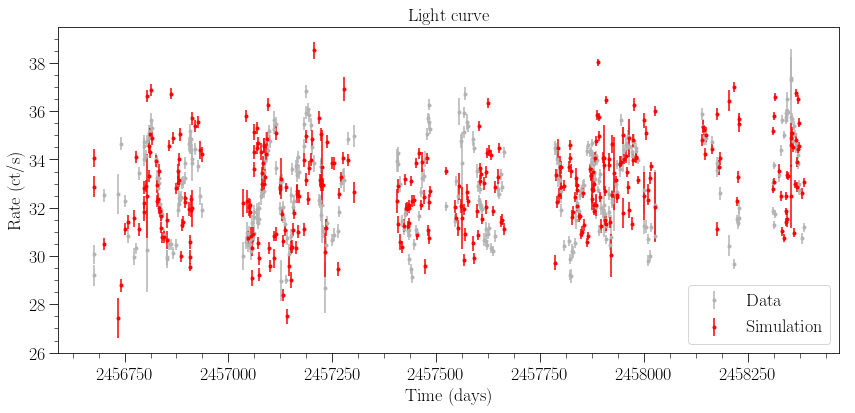

In [7]:
A,v_bend,a_low,a_high,c = 2.0, 1.0/95.0, 0.0, 1.0, 0 
tklc = Simulate_TK_Lightcurve(BendingPL,(A,v_bend,a_low,a_high,c), 
                              lightcurve=lc,mean=lc.mean, tbin=lc.tbin,length=lc.length,std=lc.std)

plt.figure(figsize=(14,6))
plt.title('Light curve', fontsize=18)
plt.errorbar(lc.time,lc.flux,lc.errors,fmt='.',color='0.7',label='Data')
plt.errorbar(tklc.time, tklc.flux,lc.errors , fmt='.r', label='Simulation')
plt.xlabel('Time (days)', fontsize=18)
plt.ylabel('Rate (ct/s)', fontsize=18)
plt.legend(numpoints=1,fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='major', length=9)
plt.tick_params(axis='both', which='minor', length=4.5)
plt.minorticks_on()
